<a href="https://colab.research.google.com/github/Kshitij-Ambilduke/Memes-vs-Notes/blob/master/Numpy_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:

import os
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
import cv2
import random
import numpy as np

In [29]:
meme_path = "/content/drive/My Drive/dataset stage 0 /meme"
note_path = "/content/drive/My Drive/dataset stage 0 /note"

In [30]:
def dataloader(folder,label):
    images=[]
    labels=[]
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,file),0)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (100,100))
        images.append(img)
        labels.append(label)
    return images, labels

In [31]:
meme, memelabel = dataloader(meme_path, 1)
note, notelabel = dataloader(note_path, 0)

In [32]:
meme = np.array(meme)
memelabel = np.array(memelabel)
#print(meme.__len__())
meme = meme.reshape(800,1,100,100)
note = np.array(note)
note = note.reshape(800,1,100,100)
notelabel = np.array(notelabel)
#print(len(notelabel))

memezip = list(zip(meme, memelabel))
notezip = list(zip(note, notelabel))

toshuffle = []
toshuffle = memezip[0:750] + notezip[0:750]
random.shuffle(toshuffle)
xtrain, ytrain = list(zip(*toshuffle))

toshuffle = []
toshuffle = memezip[750:775] + notezip[750:775]
random.shuffle(toshuffle)
xtest, ytest = list(zip(*toshuffle))

toshuffle = []
toshuffle = memezip[775:] + notezip[775:]
random.shuffle(toshuffle)
xval, yval = list(zip(*toshuffle))

In [33]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)
xval = np.array(xval)

xtrain = xtrain.reshape(1500,-1)
xtest = xtest.reshape(50,-1)
xval = xval.reshape(50,-1)

print(xtrain.shape)


(1500, 10000)


In [34]:
xtrain = np.array(xtrain).T
xtest = np.array(xtest).T
xval = np.array(xval).T


In [35]:
print(xtrain.shape)

(10000, 1500)


In [36]:
def one_hot(y):
  Y = np.zeros((2,y.shape[0]))
  for n,i in enumerate(range(len(y))):
    #if y[i]!=0:
    Y[y[i],n]=1
  return Y

Ytrain = one_hot(np.array(ytrain))
Ytest = one_hot(np.array(ytest))
Yval = one_hot(np.array(yval))

In [37]:
print(xtrain.shape)


(10000, 1500)


In [38]:
ytrain = np.array(ytrain)
yval = np.array(yval)
ytest = np.array(ytest)

In [39]:
print(xtrain.shape)

(10000, 1500)


In [40]:
def initialize_parameters(dims):
    parameters={}
    l = len(dims)
    for i in range(1,l):
        parameters['W'+str(i)] = np.random.randn(dims[i],dims[i-1])*0.01
        parameters['b'+str(i)] = np.zeros((dims[i],1))
    return parameters

In [41]:
def relu(Z):
    x = np.maximum(0,Z)
    return x

In [42]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x/np.sum(e_x, axis=0, keepdims=True)

In [43]:
def forward_propagation(X, parameters):
    cache = {}
    l = len(parameters)//2
    cache['A0'] = X
    for i in range(1,l+1):
        cache['Z'+str(i)] = np.dot(parameters['W'+str(i)],cache['A'+str(i-1)]) + parameters['b'+str(i)]
        
        cache['A'+str(i)] = relu(cache['Z'+str(i)])
        
    cache['A'+str(l)] = softmax(cache['Z'+str(l)])
            
    return cache

In [44]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = -1*np.sum(Y*np.log(AL))/m
    return cost

In [45]:
def backRelu(Z):
    z = np.zeros((Z.shape[0],Z.shape[1]))
    for i in range(Z.shape[0]):
      for j in range(Z.shape[1]):
        if Z[i,j]>0:
          z[i,j] = 1
        else:
          z[i,j] = 0
    return z
        

In [46]:
def back_propagation(X, Y, parameters, cache):
    m = Y.shape[1]
    l = len(parameters)//2
    back_cache = {}
    
    dZ = cache['A'+str(l)] - Y
    back_cache['dW'+str(l)] = (1/m)*np.dot(dZ, cache['A'+str(l-1)].T)
    back_cache['db'+str(l)] = (1/m)*np.sum(dZ, axis=1, keepdims = True)
    
    for i in reversed(range(1,l)):
        dZ = np.dot(parameters['W'+str(i+1)].T,dZ)*backRelu(cache['Z'+str(i)])
        back_cache['dW'+str(i)] = (1/m)*np.dot(dZ, cache['A'+str(i-1)].T)
        back_cache['db'+str(i)] = (1/m)*np.sum(dZ, axis=1, keepdims=True)
     
    return back_cache

In [47]:
def update(paramters, back_cache, lr):
    l = len(parameters)//2
    for i in range(1,l+1):
        parameters['W'+str(i)] -= lr*back_cache['dW'+str(i)]
        parameters['b'+str(i)] -= lr*back_cache['db'+str(i)]
        
    return parameters
        

In [48]:
def predict(pred, Y):
  temp=[]
  pred = pred.T
  for i in pred:
    temp.append(np.argmax(i))
  
  count = 0

  for i in range(len(temp)):
    if temp[i] == Y[i]:
      count+=1
      
  return count
    



In [49]:
ytrain = np.array(ytrain)

In [64]:
parameters = initialize_parameters([10000, 5000,100, 2])

In [51]:
#print(ytrain.shape)
xtrain = xtrain/255

In [63]:
xval = xval/255
xtest = xtest/255

In [65]:
trainloss=[]
valloss = []
trainacc = []
valacc = []
testacc = []

for i in range(5):
    k=0
    for j in range(150):

        cache = forward_propagation(xtrain[:,k:k+10], parameters)
       

        c = compute_cost(cache['A'+str(len([10000, 5000,100, 2])-1)],Ytrain[:,k:k+10])
        #vloss = compute_cost(valcache['A'+str(len([10000, 5000,100, 2])-1)],Yval[:,k:k+10])    


        grads = back_propagation(xtrain, Ytrain[:,k:k+10], parameters, cache)
        parameters = update(parameters, grads, 0.01)
        k+=10

    valcache = forward_propagation(xval, parameters)
    testcache = forward_propagation(xtest, parameters)
    cache = forward_propagation(xtrain, parameters)     
    
    c = compute_cost(cache['A'+str(len([10000, 5000,100, 2])-1)],Ytrain)
    vloss = compute_cost(valcache['A'+str(len([10000, 5000,100, 2])-1)],Yval)  

        
    tracc = predict(cache['A'+str(len([10000, 5000,100, 2])-1)],ytrain)
    vacc = predict(valcache['A'+str(len([10000, 5000,100, 2])-1)],yval)
    tacc = predict(testcache['A'+str(len([10000, 5000,100, 2])-1)],ytest)

    trainloss.append(c)
    valloss.append(vloss) 
    trainacc.append(tracc)
    valacc.append(vacc) 
    testacc.append(tacc)

    print(c) 
    print(f"training acc = {tracc}")
    print(f"testing acc = {tacc}")
    print(f"validation acc = {vacc}")
    print()  
    


0.6097969217966318
training acc = 1002
testing acc = 32
validation acc = 32

0.45852175572144294
training acc = 1208
testing acc = 39
validation acc = 40

0.20682679368460666
training acc = 1379
testing acc = 47
validation acc = 45

0.14189025141747327
training acc = 1429
testing acc = 49
validation acc = 45

0.16857241236409465
training acc = 1406
testing acc = 48
validation acc = 45



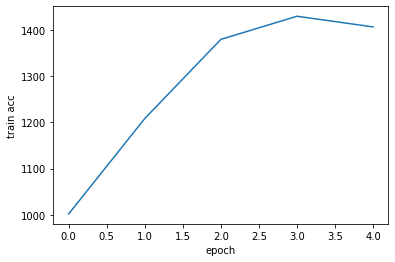

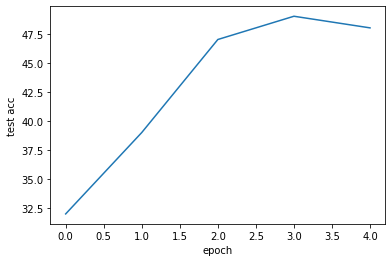

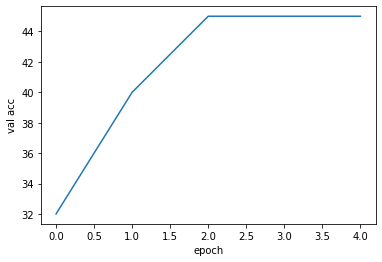

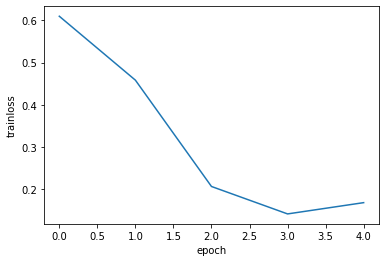

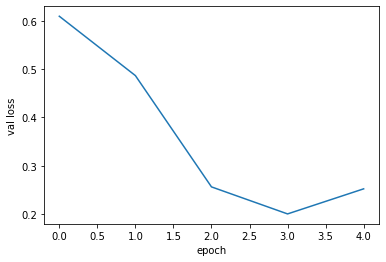

In [66]:
from matplotlib import pyplot as plt
def plot(data,labelx,labely):
  plt.plot(data)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.show()
plot(trainacc,'epoch','train acc')
plot(testacc,'epoch','test acc')
plot(valacc,'epoch','val acc')
plot(trainloss,'epoch','trainloss')
plot(valloss,'epoch','val loss')
